In [ ]:
import pandas as pd

# Load dataset
file_path = 'Airline_Reviews.csv'
df = pd.read_csv(file_path)

# Memastikan kolom yang dibutuhkan tersedia
required_columns = ['Review_content', 'Rating', 'Traveller_type']
if not all(col in df.columns for col in required_columns):
    print(f"Kolom yang dibutuhkan tidak ditemukan. Pastikan dataset memiliki kolom: {required_columns}")
else:
    # Menghapus baris dengan nilai missing pada kolom 'review_content'
    df = df.dropna(subset=['Review_content'])

    # Menangani missing values pada kolom 'traveller_type'
    # dan mengganti kategori langka menjadi "Other"
    traveller_counts = df['Traveller_type'].value_counts()
    dominant_travellers = traveller_counts.nlargest(3).index  # Mengambil 3 kategori dominan

    # Mengonversi kategori langka menjadi "Other" dan mengisi missing values dengan "Other"
    df['Traveller_type'] = df['Traveller_type'].apply(lambda x: x if x in dominant_travellers else 'Other')
    df['Traveller_type'] = df['Traveller_type'].fillna('Other')

    # Menghapus duplikasi pada kolom 'review_content' untuk menghindari duplikasi teks
    df = df.drop_duplicates(subset=['Review_content'])

    # Menampilkan hasil akhir
    print(df.info())
    print(df.head())

    # Menyimpan hasil ke file baru jika diperlukan
    cleaned_file_path = 'Cleaned_Airline_Reviews.csv'
    df.to_csv(cleaned_file_path, index=False)
    print(f"Data yang telah dibersihkan disimpan di {cleaned_file_path}")


<class 'pandas.core.frame.DataFrame'>
Index: 2807 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  2246 non-null   object 
 1   Flying_month    1810 non-null   object 
 2   Route           1822 non-null   object 
 3   Rating          2253 non-null   float64
 4   Verified        809 non-null    object 
 5   Review_title    2258 non-null   object 
 6   Review_content  2807 non-null   object 
 7   Traveller_type  2807 non-null   object 
 8   Class           2237 non-null   object 
dtypes: float64(1), object(8)
memory usage: 219.3+ KB
None
  Passanger_Name          Flying_month                  Route  Rating  \
0     Paige Boet             June 2023  New Orleans to London     1.0   
1            NaN            March 2023        London to Amman     1.0   
2    E Lanewoski    Heathrow to Bodrum         Business Class     2.0   
4            NaN  London City to Ibiza         Busine

In [ ]:
# Load dataset
file_path = 'Cleaned_Airline_Reviews.csv'
df = pd.read_csv(file_path)
df.head(30)


,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,June 2023,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Other,Economy Class
1,NaN,March 2023,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,NaN
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",Other,NaN
3,NaN,London City to Ibiza,Business Class,7.0,Trip Verified,NaN,This is a two-for-one review covering economy ...,Other,Family Leisure
4,M King,June 2023,London to Washington,1.0,NaN,Communication is terrible,Absolutely horrible airline. Communication is ...,Other,Economy Class
5,Richard Hodges,London Heathrow to Kalamata,Economy Class,7.0,Trip Verified,NaN,Travelled to Heathrow to Kalamata and return j...,Other,Couple Leisure
6,Carol Willmore,June 2023,London to Funchal,1.0,NaN,flight failed at every level,This flight failed at every level. We were del...,Other,NaN
7,Nadine Kohler,June 2023,NaN,1.0,Not Verified,BA refuses to make it right,Beware of British Airways and their marketing ...,Other,Economy Class
8,NaN,June 2023,NaN,2.0,Trip Verified,shame for such well known airline,I flew from Cairo to Heathrow on what they cal...,Other,Business Class
9,Cosmin Stefanescu,June 2023,Bucharest to Dallas via London,1.0,Not Verified,Total garbage,"I flew with numerous airlines, but I gotta adm...",Other,NaN


In [ ]:
# Pengecekan missing values di setiap kolom
missing_values = df.isnull().sum()
print("\nJumlah missing values di setiap kolom:")
display(missing_values)

# Pengecekan tipe data untuk memastikan semua kolom memiliki tipe data yang benar
print("\nInformasi tipe data setiap kolom:")
display(df.info())

# Pengecekan nilai di kolom 'rating' untuk memastikan tidak ada nilai yang tidak sesuai (misalnya, nilai non-numerik atau di luar skala)
if 'rating' in df.columns:
    invalid_ratings = df[~df['rating'].astype(str).str.isnumeric() | (df['rating'] < 0) | (df['rating'] > 5)]
    print("\nNilai rating yang tidak sesuai:")
    display(invalid_ratings)

# Pengecekan nilai yang tidak valid pada kolom 'traveller_type'
if 'traveller_type' in df.columns:
    traveller_types = df['traveller_type'].unique()
    print("\nKategori traveller_type yang ditemukan:")
    display(traveller_types)


Jumlah missing values di setiap kolom:


,0
Passanger_Name,561
Flying_month,997
Route,985
Rating,554
Verified,1998
Review_title,549
Review_content,0
Traveller_type,0
Class,570



Informasi tipe data setiap kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2807 entries, 0 to 2806
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  2246 non-null   object 
 1   Flying_month    1810 non-null   object 
 2   Route           1822 non-null   object 
 3   Rating          2253 non-null   float64
 4   Verified        809 non-null    object 
 5   Review_title    2258 non-null   object 
 6   Review_content  2807 non-null   object 
 7   Traveller_type  2807 non-null   object 
 8   Class           2237 non-null   object 
dtypes: float64(1), object(8)
memory usage: 197.5+ KB


None

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline



# Hanya gunakan baris yang memiliki rating untuk melatih model
df_with_rating = df.dropna(subset=['Rating'])

# Pra-pemrosesan teks dan pelatihan model
# Bagi data menjadi fitur (X) dan target (y)
X = df_with_rating['Review_content']
y = df_with_rating['Rating']

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat pipeline dengan TF-IDF dan Random Forest Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Ekstraksi fitur dengan TF-IDF
    ('classifier', RandomForestClassifier())        # Model klasifikasi
])

# Latih model
pipeline.fit(X_train, y_train)

# Evaluasi model
y_pred = pipeline.predict(X_test)
print("Akurasi model:", accuracy_score(y_test, y_pred))
print("Laporan klasifikasi:\n", classification_report(y_test, y_pred))

# Gunakan model untuk memprediksi rating pada ulasan tanpa rating
df_no_rating = df[df['Rating'].isnull()]
if not df_no_rating.empty:
    df_no_rating['Rating'] = pipeline.predict(df_no_rating['Review_content'])

    # Gabungkan data yang terisi rating dengan data awal
    df_filled = pd.concat([df_with_rating, df_no_rating], axis=0)
    df_filled.sort_index(inplace=True)
else:
    df_filled = df_with_rating

# Tampilkan beberapa hasil untuk ulasan yang sebelumnya tanpa rating
print("\nContoh ulasan dengan rating yang diprediksi:")
print(df_no_rating[['Review_content', 'Rating']].head())

# Simpan data yang telah diisi rating
df_filled.to_csv('Filled_Airline_Reviews.csv', index=False)
print("Dataset dengan rating yang diisi telah disimpan sebagai 'Filled_Airline_Reviews.csv'")


Akurasi model: 0.31929046563192903
Laporan klasifikasi:
               precision    recall  f1-score   support

         1.0       0.34      0.99      0.50        99
         2.0       0.13      0.04      0.06        55
         3.0       0.21      0.07      0.11        42
         4.0       1.00      0.03      0.06        35
         5.0       0.00      0.00      0.00        25
         6.0       0.00      0.00      0.00        20
         7.0       0.17      0.02      0.04        42
         8.0       0.29      0.39      0.33        49
         9.0       0.27      0.08      0.13        48
        10.0       0.37      0.44      0.41        36

    accuracy                           0.32       451
   macro avg       0.28      0.21      0.16       451
weighted avg       0.29      0.32      0.22       451


Contoh ulasan dengan rating yang diprediksi:
                                       Review_content  Rating
10  We were traveling as a family (5 people). Beca...     1.0
15  May 3, fle

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-13-c3f92cc8068a>:38: SettingWithCo

Dataset dengan rating yang diisi telah disimpan sebagai 'Filled_Airline_Reviews.csv'


In [ ]:
# Load dataset
file_path = 'Filled_Airline_Reviews.csv'
df = pd.read_csv(file_path)
df.head(10)



# Cek missing values di setiap kolom
missing_values = df.isnull().sum()
print("\nJumlah missing values di setiap kolom:")
print(missing_values)


Jumlah missing values di setiap kolom:
Passanger_Name     561
Flying_month       997
Route              985
Rating               0
Verified          1998
Review_title       549
Review_content       0
Traveller_type       0
Class              570
dtype: int64


<ipython-input-18-38d231a6cb72>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traveller_counts.index, y=traveller_counts.values, palette='viridis')


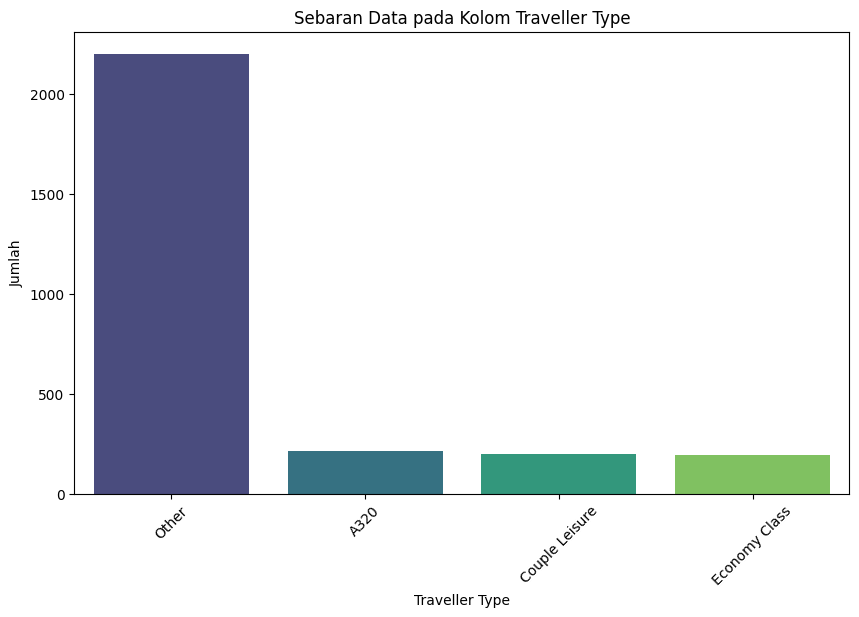

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Memastikan kolom traveller_type tidak memiliki missing values
if df['Traveller_type'].isnull().sum() == 0:
    # Menghitung frekuensi setiap kategori traveller_type
    traveller_counts = df['Traveller_type'].value_counts()

    # Visualisasi dengan seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x=traveller_counts.index, y=traveller_counts.values, palette='viridis')
    plt.title('Sebaran Data pada Kolom Traveller Type')
    plt.xlabel('Traveller Type')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Terdapat missing values pada kolom 'traveller_type'. Harap bersihkan terlebih dahulu.")

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Pastikan Anda telah mengunduh stopwords dan WordNet
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
file_path = 'Filled_Airline_Reviews.csv'
df = pd.read_csv(file_path)

# Inisialisasi stopwords dan lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Mengubah teks ke huruf kecil
    text = text.lower()
    # Menghapus karakter khusus dan angka
    text = re.sub(r'[^a-z\s]', '', text)
    # Menghapus stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Lemmatization (mengubah kata ke bentuk dasar)
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# Terapkan fungsi pembersihan ke kolom 'review_content'
df['cleaned_review_content'] = df['Review_content'].apply(clean_text)

# Tampilkan beberapa hasil
print(df[['Review_content', 'cleaned_review_content']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                      Review_content  \
0  The airline lost my luggage and was absolutely...   
1  We booked on the BA website, round trip flight...   
2  First time flying with BA business class, neve...   
3  This is a two-for-one review covering economy ...   
4  Absolutely horrible airline. Communication is ...   

                              cleaned_review_content  
0  airline lost luggage absolutely awful througho...  
1  booked ba website round trip flight seattle am...  
2  first time flying ba business class never boar...  
3  twoforone review covering economy business cla...  
4  absolutely horrible airline communication terr...  


In [ ]:
# Hapus kolom yang tidak diperlukan
columns_to_keep = ['cleaned_review_content', 'Rating', 'Traveller_type']
df_cleaned = df[columns_to_keep]

# Simpan hasil ke file CSV baru
final_file_path = 'Cleaned_Final_Airline_Reviews.csv'
df_cleaned.to_csv(final_file_path, index=False)
print(f"Hasil akhirnya telah disimpan sebagai '{final_file_path}'")

# Untuk Google Colab, unduh file akhir
from google.colab import files
files.download(final_file_path)

Hasil akhirnya telah disimpan sebagai 'Cleaned_Final_Airline_Reviews.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>